# Neural & Behavioral Modeling - Week 4 (Exercises)
by 駱皓正 (austenpsy@gmail.com)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Replicate exisiting findings/models 
Based on your personal interest, please choose and replicate ONE of the following studies:

1. <a href="http://ccl.northwestern.edu/netlogo/models/FlockingVeeFormations">Flocking Vee Formations</a> in NetLogo's [Sample Models::Biology] 

2. <a href="http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation">Wolf-Sheep Predation</a> in NetLogo's [Sample Models::Biology] 

3. <a href="https://www.wetalk.tw/thread-36278-1-1.html">MIT Matching Game</a>

4. Gray, K., Rand, D. G., Ert, E., Lewis, K., Hershman, S., & Norton, M. I. (2014). <a href="http://www.mpmlab.org/groups/">The emergence of “us and them” in 80 lines of code: Modeling group genesis in homogeneous populations</a>. Psychological Science, 25(4), 982-990.

5. Luhmann, C. C., & Rajaram, S. (2015). <a href="http://journals.sagepub.com/doi/abs/10.1177/0956797615605798">Memory transmission in small groups and large networks: An agent-based model</a>. Psychological Science, 26(12), 1909-1917.

# ANSWER

The wolf-sheep predation simulation is implemented below w/o refering to the netlogo algorithm.

KeyboardInterrupt: 

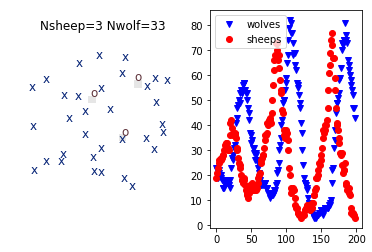

In [5]:
# Write your codes here
# Model parameters

Nsheep = 60
Nwolf = 20
turf = 20 # turf size
grow_grass_rate = 20



class Sheep:
    def __init__(self,turf):
        turf_size=len(turf)
        self.energy=20 # initial energy
        self.xy=random.randint(0,turf_size,2) # locations
        turf[self.xy[0],self.xy[1]]+=1

    def move(self,turf):
        turf_size=len(turf)
        turf[self.xy[0],self.xy[1]]-=1
        self.xy+=random.randint(-1,2,2) # renew locations
        self.xy=mod(self.xy,turf_size) # cyclic boundaries
        turf[self.xy[0],self.xy[1]]+=1
        
        
    def eatenbywolf(self,turf):
        turf_size=len(turf)
        if(turf[self.xy[0],self.xy[1]]==0): # have been eaten
            self.energy=0
    
    def eatgrass(self,turf):
        turf_size=len(turf)
        if(turf[self.xy[0],self.xy[1]]==1): # have been eaten
            turf[self.xy[0],self.xy[1]]=0
            self.energy+=1
    
class Wolf:
    def __init__(self,turf):
        turf_size=len(turf)
        self.energy=30 # initial energy
        self.xy=random.randint(0,turf_size,2) # locations
    
    def move(self,turf):
        turf_size=len(turf)
        self.xy+=random.randint(-2,3,2) # renew locations
        self.xy=mod(self.xy,turf_size) # cyclic boundaries
        self.energy-=1.5
    
    def eatsheep(self,turf,wolves):
        turf_size=len(turf)
        if(turf[self.xy[0],self.xy[1]]>0): # there is sheep
            wolves.append(Wolf(turf))
            turf[self.xy[0],self.xy[1]]=0 # eat it!

def growgrass(turf):
    for i in range(0,len(turf)):
        for j in range(0,len(turf)):
            if(turf[i,j]==0):
                turf[i,j]+=1

def plot_turf(turf,sheeps,wolves,sary,wary):
    sz=len(turf)
    clf() # clear previous figure
    
    subplot(121)
    spy(turf,alpha=0.1)
    for s in sheeps:
        offset=(random.rand(2)-1)/2 # adding some positional offsets to avoid overlapping of agents
        text(s.xy[1]+offset[1],s.xy[0]+offset[0],'o',{'size':12,'color':[ 0.37488132,  0.20361916,  0.2352512 ]})
    for w in wolves:
        offset=(random.rand(2)-1)/2 # adding some positional offsets to avoid overlapping of agents
        text(w.xy[1]+offset[1],w.xy[0]+offset[0],'x',{'size':12,'color':[ 0.01865694,  0.13856688,  0.46322519]})
    title('Nsheep='+str(len(sheeps))+' Nwolf='+str(len(wolves)))
    axis('off')
    
    
    subplot(122)
    plot(arange(0,len(wary)-1,1),wary[0:-1],'bv') 
    plot(arange(0,len(sary)-1,1),sary[0:-1],'ro')
    legend(['wolves','sheeps']);
    
    display(gcf()); clear_output(wait=True) # to allow dynamic plots 

# Initialization:
t_grid=ones((turf,turf))
a_grid=zeros((turf,turf))
sheeps = [Sheep(a_grid) for i in range(Nsheep)] 
wolves = [Wolf(a_grid) for i in range(Nwolf)]

#simulation
totalanimals = len(sheeps)+len(wolves)
count = 1
sary, wary = [Nsheep],[Nwolf]
while(totalanimals > 0):
    for s in sheeps:
        s.move(a_grid)
        s.eatgrass(t_grid)
        if(s.energy>=25):
            sheeps.append(Sheep(a_grid))
            s.energy-=5
    for w in wolves:
        w.move(a_grid)       
        w.eatsheep(a_grid,wolves)
    for s in sheeps:
        s.eatenbywolf(a_grid)
    Nsheeps=len(sheeps)
    Nwolves=len(wolves)
    sheeps=[sheeps[i] for i in range(Nsheeps) if sheeps[i].energy>0] # some people died
    wolves=[wolves[i] for i in range(Nwolves) if wolves[i].energy>0] # some people died
    if(mod(count,grow_grass_rate)==0):
        growgrass(t_grid)
    if(len(sary)<200):
        sary.append(Nsheeps)
    else:
        sary.pop(0)
        sary.append(Nsheeps)
    if(len(wary)<200):
        wary.append(Nwolves)
    else:
        wary.pop(0)
        wary.append(Nwolves)
    plot_turf(a_grid,sheeps,wolves,sary,wary)
    totalanimals = Nsheeps+Nwolves
    count+=1